# Import relevant modules

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Create file object

In [2]:
file = '6. Categorical variables. Visualization techniques_exercise.xlsx'

In [3]:
xlsx = pd.ExcelFile(file)

## Display all Excel worksheet names in workbook

In [4]:
print("Worksheet Names:", xlsx.sheet_names)

Worksheet Names: ['Frequency distribution table', 'Bar chart', 'Pie chart', 'Pareto diagram']


## Manually entering data into a dictionary

In [5]:
data = {'locations': ['New York', 'LA', 'San Francisco'], 'units_sold': [12327, 17129, 19923]}

## Convert the dictionary to a DataFrame

In [6]:
freq_dist_tbl = pd.DataFrame(data)
freq_dist_tbl.set_index('locations', inplace=True)

## Exercise - Frequency distribution table

In [7]:
print(freq_dist_tbl)

               units_sold
locations                
New York            12327
LA                  17129
San Francisco       19923


## Exercise - Bar chart

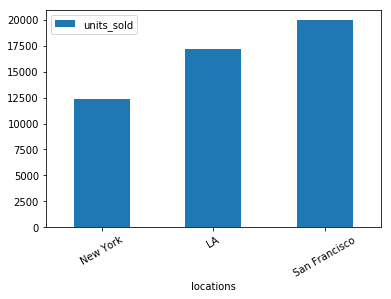

In [8]:
freq_dist_tbl.plot.bar(rot=30)

## Exercise - Pie chart - Task 1 - Add a column for relative frequency

In [9]:
freq_dist_tbl['relative_frequency'] = freq_dist_tbl['units_sold'] / freq_dist_tbl['units_sold'].sum()

In [10]:
print(freq_dist_tbl)

               units_sold  relative_frequency
locations                                    
New York            12327            0.249641
LA                  17129            0.346888
San Francisco       19923            0.403471


## Exercise - Pie chart - Task 2 - Make a pie chart

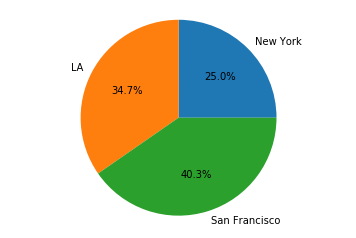

In [11]:
labels = list(freq_dist_tbl.index)
pct_of_co_sales = list(freq_dist_tbl['relative_frequency'])
fig2, ax1 = plt.subplots()
ax1.pie(pct_of_co_sales, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()